In [1]:
import pandas as pd

In [2]:
data_banco = pd.read_csv('dataset_banco.csv')

In [3]:
# Mostramos la tabla del banco y empezamos a comprender las características del dataset para realizar la limpieza de los datos.

data_banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [9]:
#REVISAMOS TODOS LOS DATOS UNICOS QUE EXISTE EN LA COLUMNA PARA VERIFICAR SI HAY PALABRAS QUE SIGNIFICAN LO MISMO PERO MAL ESCRITAS O ABREVIADAS
data_banco['job'].unique().tolist()

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'Management',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'MANAGEMENT',
 'Self-employed',
 'unemployed',
 'housemaid',
 'student',
 'Services',
 'Retired',
 'administrative',
 nan]

In [36]:
# 1 forma de hacerlo: data_banco['job'].replace('Management':'management')  ...  sin guardar
# 2 forma de hacerlo: data_banco['job'].replace({'Management':'management', 'MANAGEMENT': 'management'}, inplace=True)  .... guardandolo directo
# 3 forma de hacerlo: data_banco['job'] = data_banco['job'].replace({'Management':'management', 'MANAGEMENT': 'management'})  ... guardarlo en tabla

data_banco['job'] = data_banco['job'].replace({'Management':'management', 'MANAGEMENT': 'management', 'managemen': 'management'})
data_banco['job'] = data_banco['job'].replace({'admin.':'administrative'})
data_banco['job'] = data_banco['job'].replace({'Self-employed':'self-employed'})
data_banco['job'] = data_banco['job'].replace({'Retired':'retired'})
data_banco['job'] = data_banco['job'].replace({'Services':'services'})

In [37]:
# VERIFICAMOS EL REEMPLAZO EN LA LISTA DE LA COLUMNA "job" PARA TENER VALORES ÚNICOS CORRECTAMENTE ESCRITOS
data_banco['job'].unique().tolist()

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'administrative',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student',
 nan]

In [38]:
# AHORA VERIFICAMOS EL LAS SIGUIENTE COLUMNAS, EN ESTE CASO "marital"
data_banco['marital'].unique().tolist()

['married', 'single', 'div.', 'divorced', 'DIVORCED', 'Single', nan]

In [39]:
# REEMPLAZANDO
data_banco['marital'] = data_banco['marital'].replace({'div.':'divorced', 'DIVORCED':'divorced', 'Single':'single'})

In [40]:
# VERIFICAMOS LOS CAMBIOS
data_banco['marital'].unique().tolist()

['married', 'single', 'divorced', nan]

In [41]:
# AHORA VERIFICAMOS EL LAS SIGUIENTE COLUMNAS, EN ESTE CASO "education"
data_banco['education'].unique().tolist()

['tertiary',
 'secondary',
 'unknown',
 'primary',
 'SECONDARY',
 'Secondary',
 'Primary',
 'sec.',
 'Tertiary',
 'UNK',
 nan]

In [50]:
# VAMOS A PASAR TODAS LAS LETRAS DE NUESTRA TABLA A MINUSCULAS PARA AHORRAR TIEMPO EN LA LIMPIEZA Y GENERAR UN ORDEN EN LA TABLA
data_banco['education'] = data_banco['education'].str.lower()

In [52]:
# REEMPLAZANDO
data_banco['education'] = data_banco['education'].replace({'sec.':'secondary', 'unk':'unknown'})

In [53]:
data_banco['education'].unique().tolist()

['tertiary', 'secondary', 'unknown', 'primary', nan]

In [ ]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "default"
data_banco['default'] = data_banco['default'].str.lower()

In [54]:
data_banco['default'].unique().tolist()

['no', 'yes']

In [ ]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "housing"
data_banco['housing'] = data_banco['housing'].str.lower()

In [55]:
data_banco['housing'].unique().tolist()

['yes', 'no']

In [57]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "loan"
data_banco['loan'] = data_banco['loan'].str.lower()

In [58]:
data_banco['loan'].unique().tolist()

['no', 'yes']

In [59]:
# COLUMNA "contact" necesita cambios
data_banco['contact'].unique().tolist()

['unknown', 'cellular', 'telephone', 'phone', 'mobile']

In [60]:
data_banco['contact'] = data_banco['contact'].str.lower()

In [61]:
# REEMPLAZANDO
data_banco['contact'] = data_banco['contact'].replace({'cellular':'mobile', 'phone':'telephone'})

In [62]:
# VERIFICAMOS
data_banco['contact'].unique().tolist()

['unknown', 'mobile', 'telephone']

In [63]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "month"
data_banco['month'].unique().tolist()

['may',
 'nov',
 'jun',
 'jul',
 'aug',
 'oct',
 'dec',
 'jan',
 'feb',
 'mar',
 'apr',
 'sep']

In [64]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "poutcome"
data_banco['poutcome'].unique().tolist()

['unknown', 'UNK', 'failure', 'other', 'success', 'Success']

In [65]:
data_banco['poutcome'] = data_banco['poutcome'].str.lower()

In [66]:
data_banco['poutcome'].unique().tolist()

['unknown', 'unk', 'failure', 'other', 'success']

In [67]:
# REEMPLAZANDO
data_banco['poutcome'] = data_banco['poutcome'].replace({'unk':'unknown'})

In [68]:
data_banco['poutcome'].unique().tolist()

['unknown', 'failure', 'other', 'success']

In [69]:
# LIMPIEZA Y MODIFICACIÓN DE LA COLUMNA "y"
data_banco['y'].unique().tolist()

['no', 'yes']

In [70]:
# DESPUES DE LA LIMPIEZA DE MAYUSCULAS A MINUSCULAS, PROCEDEMOS A VER NUEVAMENTE LA TABLA
data_banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,mobile,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,mobile,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,mobile,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [71]:
data_banco.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
y             object
dtype: object

In [73]:
data_banco.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


PROCESO DE LIMPIEZA EXHAUSTIVO

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas
6. Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

1. Datos faltantes en algunas celdas

In [75]:
# Veamos las variables categóricas y las numéricas, ASÍ TAMBIEN LA CANTIDAD DE REGISTROS POR COLUMNA SABIENDO QUE SON 45215 COLUMNAS
data_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [77]:
# ELIMINAREMOS ALGUNAS FILAS CON LOS ESPACIOS VACIOS PARA IGUALAR LA CANTIDAD DE FILAS EN TODA LA TABLA.
data_banco.dropna(inplace=True)

In [80]:
# OBSERVAMOS QUE LAS FILAS ESTÁN IGUALDAS EN TODAS LAS COLUMNAS, YA QUE LA ELIMINACIÓN DE ESAS FILAS NO AFECTAN EL TOTAL DE LA TABLA
data_banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


2. Columnas irrelevantes (que no responden al problema que queremos resolver)

Una columna irrelevante puede ser:

- Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna 
que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la 
  columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores 
etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas 
con un sólo nivel, o columnas numéricas con un sólo valor:

In [81]:
# Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría 
# ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores 
etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas 
con un sólo nivel, o columnas numéricas con un sólo valor:

In [85]:
# Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
# VAMOS A VERIFICAR SI TIENE MAS DE 1 TIPO DE VALOR, SI TUVIESE SOLO 1 TENDRIAMOS QUE ELIMINAR ESA COLUMNA PORQUE NO NOS DA INFORMACIÓN
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna {col}: {data_banco[col].nunique()} subniveles')

# VERIFICAMOS Y TODAS LAS COLUMNAS TIENEN 2 SUBNIVELES O MÁS, ASÍ QUE NO PODREMOS ELIMINAR COLUMNAS

Columna job: 12 subniveles
Columna marital: 3 subniveles
Columna education: 4 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 2 subniveles
Columna contact: 3 subniveles
Columna month: 12 subniveles
Columna poutcome: 4 subniveles
Columna y: 2 subniveles


In [87]:
# Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
data_banco.describe()

# Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.
# Preservaremos todas las columnas numéricas.

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [88]:
# ELIMINAR FILAS REPETIDAS
print(f'Tamaño del set antes de eliminar filas repetidas : {data_banco.shape}')

Tamaño del set antes de eliminar filas repetidas : (45207, 17)


In [89]:
data_banco.drop_duplicates(inplace=True)

In [90]:
print(f'Tamaño del set después de eliminar filas repetidas : {data_banco.shape}')

Tamaño del set después de eliminar filas repetidas : (45203, 17)


In [92]:
# Outliers en las variables numéricas
# No siempre se deben eliminar los "outliers" porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [93]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

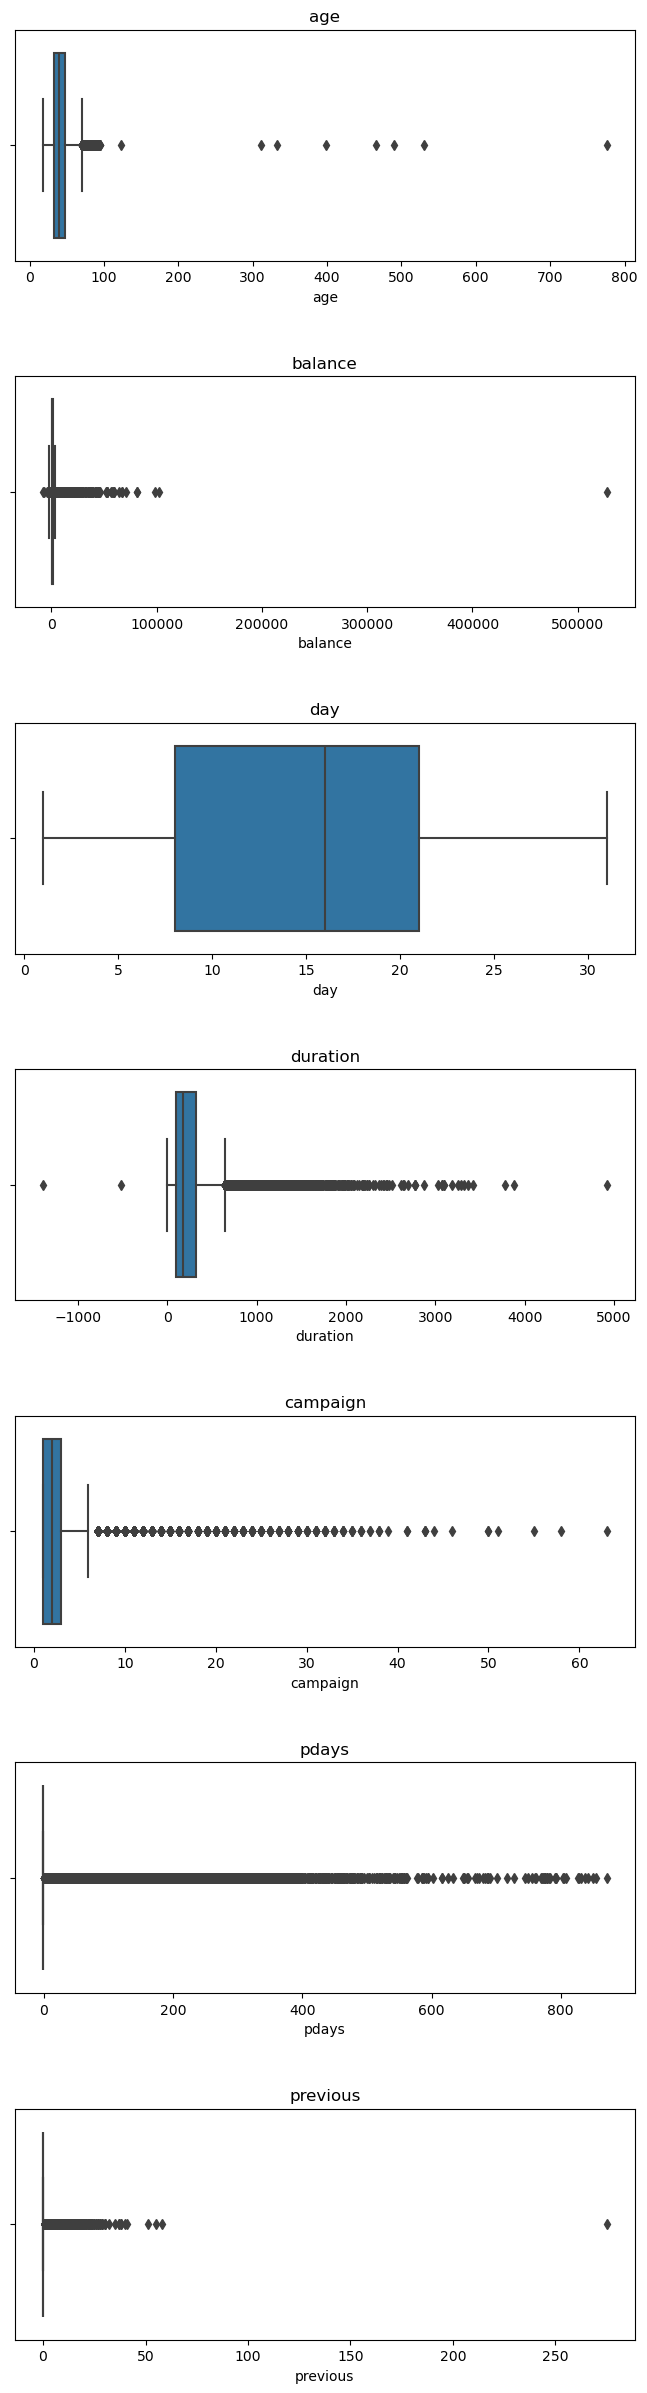

In [110]:
col_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# "norows=7" es el número de figuras hacia abajo o filas de figuras, serian 7 figuras p 7 filas de figuras.
# "ncols=1" es el número de figuras en 1 sola columna
# "figsize=(8,30)" es la amplitud del gráfico, "8" indica el ancho el eje "x" ; y el "30" el alto hacia el eje "y".
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))

# Aqui "hspace=0.5" señala la separación entre gráfica y gráfica de 0.5, mientras mas alto el número será mayor la separación.
fig.subplots_adjust(hspace=0.5)


for i, col in enumerate(col_num):
   sns.boxplot(x=col, data = data_banco, ax=ax[i])
   ax[i].set_title(col)

Observaciones:

"age": hay sujetos con edades mucho mayores a 100 años

"duration": hay valores negativos

"previous": hay un valor extremadamente alto (cercano a 300)

In [112]:
# ELIMINANDO FILAS CON AGE > 100
print(f'Tamaño del set antes de eliminar registros de edad: {data_banco.shape}')
data_banco = data_banco[data_banco['age'] <= 100]
print(f'Tamaño del set despues de eliminar registro de edad: {data_banco.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set despues de eliminar registro de edad: (45195, 17)


In [114]:
# ELIMINAR LOS VALORES NEGATIVOS DE "DURATION"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data_banco.shape}')
data_banco = data_banco[data_banco['duration'] > 0]
print(f'Tamaño del set despues de eliminar registros de duración: {data_banco.shape}')

Tamaño del set antes de eliminar registros de duración: (45190, 17)
Tamaño del set despues de eliminar registros de duración: (45190, 17)


In [115]:
# ELIMINAR EL VALOR DE PREVIOUS QUE ESTÁ MUY ALEJADO CERCA A 300
print(f'Tamaño del set antes de eliminar los registros de previos: {data_banco.shape}')
data_banco = data_banco[data_banco['previous'] < 100]
print(f'Tamaño del set despues de eliminar los registros de previos: {data_banco.shape}')

Tamaño del set antes de eliminar los registros de previos: (45190, 17)
Tamaño del set despues de eliminar los registros de previos: (45189, 17)


VAMOS A GRAFICAR LAS COLUMNAS CON LOS VALORES CORREGIDOS DE ESCRITURA PARA VERIFICAR SI NO HAY ERRORES

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

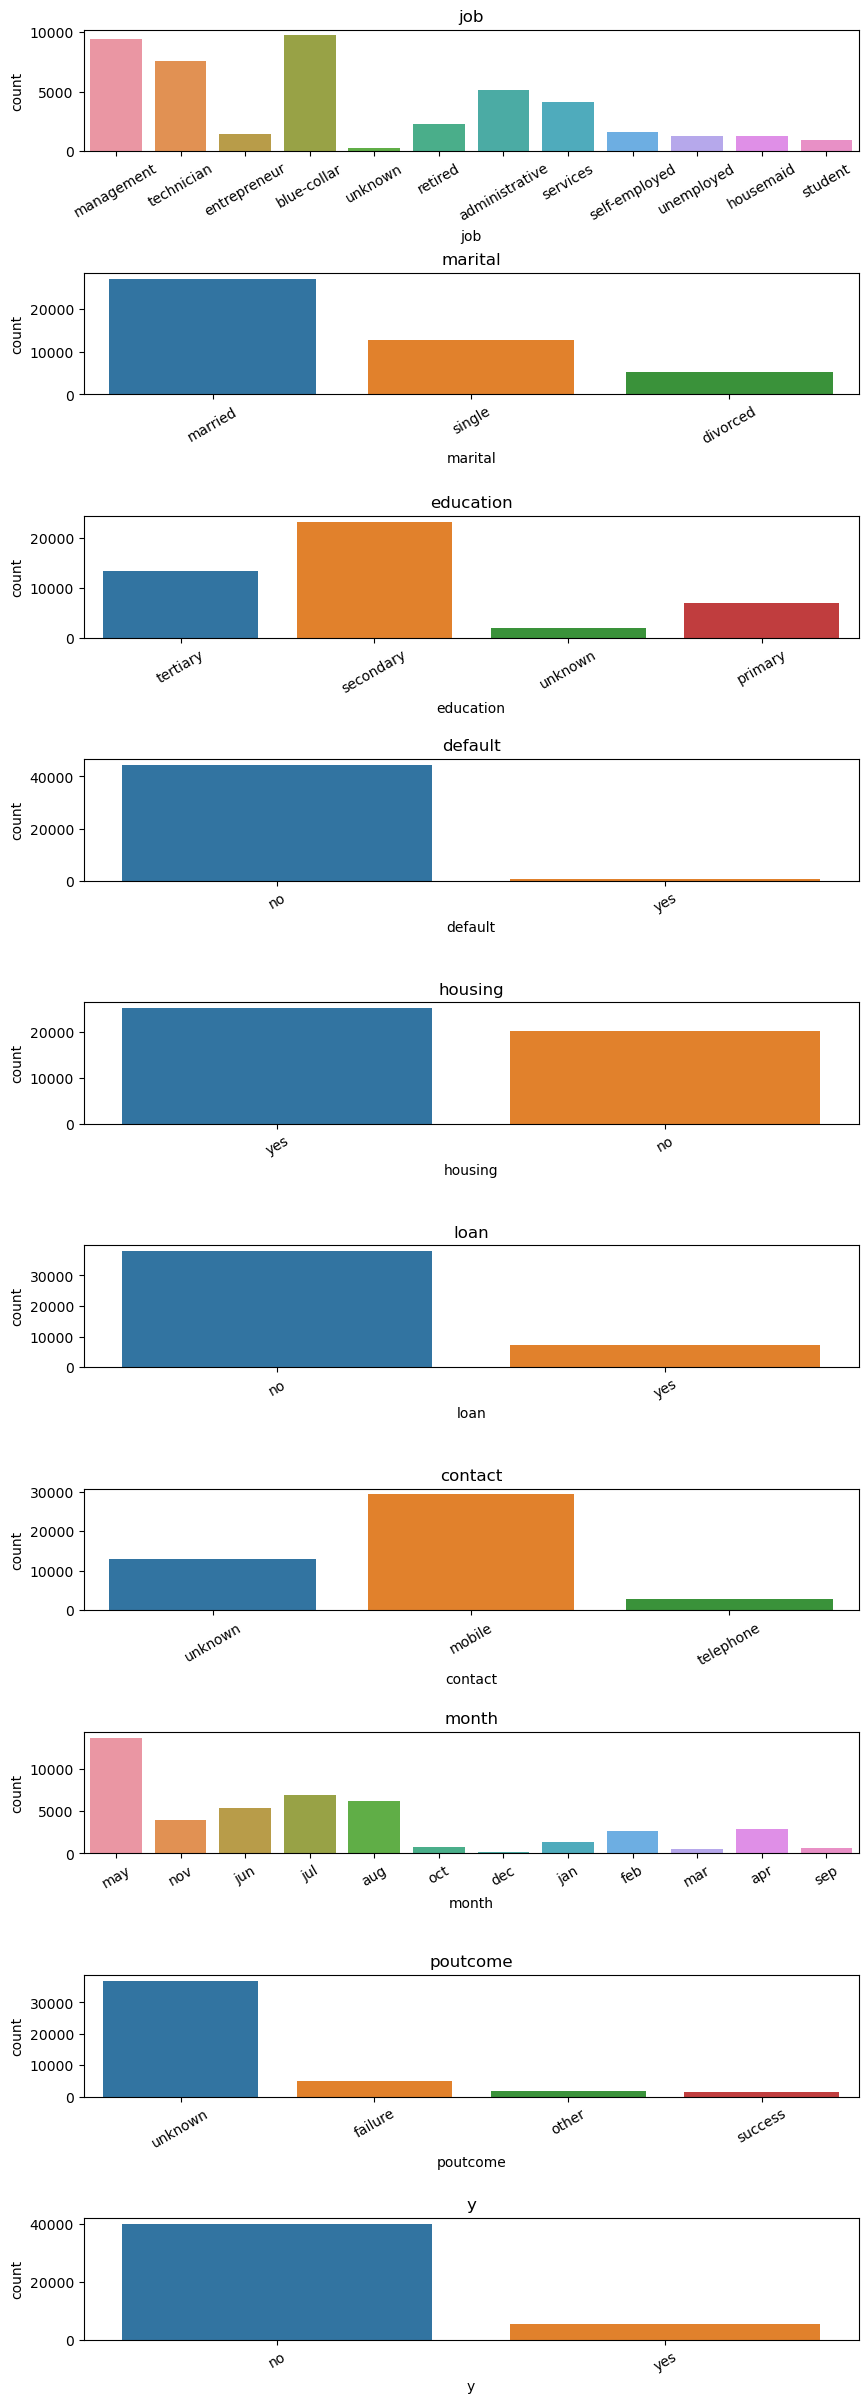

In [117]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data_banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [118]:
data_banco.shape

(45189, 17)

CON ESTA FUNCIÓN PODRÁS PASAR TODAS LAS LETRAS DE LA CELDA A MINÚSCULAS

In [119]:
for column in data_banco.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data_banco[column] = data_banco[column].str.lower()

GENEREMOS NUEVAMENTE LOS GRÁFICOS PARA OBSERVAR SI HUBO ALGÚN CAMBIO POR LAS MINÚSCULAS

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

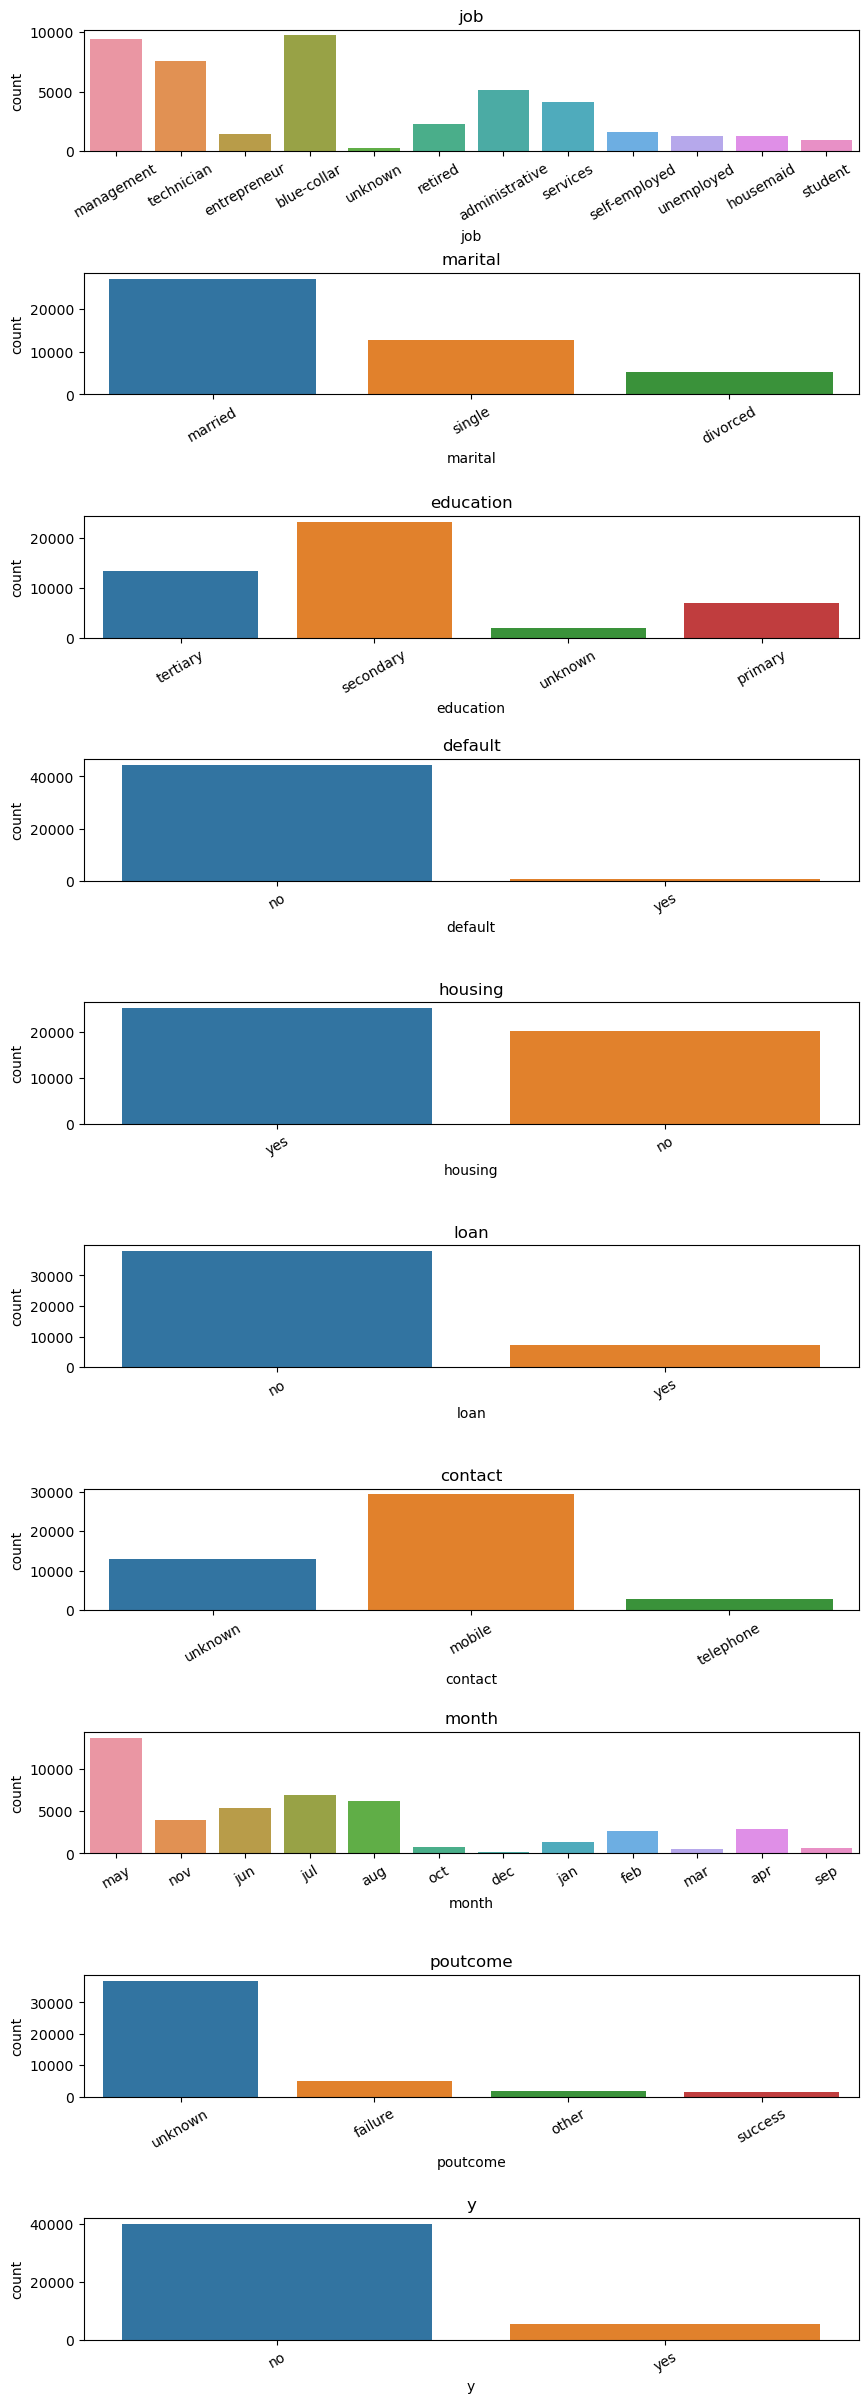

In [120]:
# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data_banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [121]:
# FINALMENTE VERIFICAMOS LAS DIMENSIONES DE FILAS Y COLUMNAS DE NUESTRA TABLA O SET
data_banco.shape

(45189, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [122]:
# PROCEDEREMOS A GUARDAR NUESTRO ARCHIVO "CSV"
# COLOCAMOS EL "INDEX=FALSE" para no guardar el index del lado izquierdo ya que solo se uso por motivos de orden y coonteo

data_banco.to_csv('clean_dataset_banco.csv', index=False)